In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd 

data = pd.read_csv('hmda_lar-1.csv', encoding='utf8')
#pickle 

# An arbitrary collection of objects supported by pickle.
data = pd.read_csv('hmda_lar-1.csv', encoding='utf8')

with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

/home/athena/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,23,24,25,28,29,30,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import pickle

with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [3]:
data[['denial_reason_name_1','denial_reason_name_3','denial_reason_name_2']]

,denial_reason_name_1,denial_reason_name_3,denial_reason_name_2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [4]:
data.isnull().sum()

tract_to_msamd_income                352
rate_spread                       102430
population                           352
minority_population                  352
number_of_owner_occupied_units       352
number_of_1_to_4_family_units        352
loan_amount_000s                       0
hud_median_family_income             352
applicant_income_000s              18512
state_name                             0
state_abbr                             0
sequence_number                    49695
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                           404
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                   94471
denial_reason_name_3              105435
denial_reason_na

In [5]:
data.shape

(105697, 47)

In [6]:
s = data.isnull().apply(sum, axis=0) # count the number of nan in each column

In [7]:
print(s)

tract_to_msamd_income                352
rate_spread                       102430
population                           352
minority_population                  352
number_of_owner_occupied_units       352
number_of_1_to_4_family_units        352
loan_amount_000s                       0
hud_median_family_income             352
applicant_income_000s              18512
state_name                             0
state_abbr                             0
sequence_number                    49695
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                           404
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                   94471
denial_reason_name_3              105435
denial_reason_na

In [8]:
for col in data: 
    if s[col] >= 5000:  
        del data[col]

In [9]:
data.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'state_name',
       'state_abbr', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'census_tract_number', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'action_taken_name'],
      dtype='object')

In [10]:
data[['tract_to_msamd_income','loan_amount_000s', 'loan_purpose_name']]

,tract_to_msamd_income,loan_amount_000s,loan_purpose_name
0,130.669998,166,Refinancing
1,92.849998,210,Home improvement
2,105.470001,82,Refinancing
3,91.889999,100,Home improvement
4,125.269997,304,Home purchase
5,95.459999,154,Home purchase
6,87.180000,148,Refinancing
7,111.639999,292,Home purchase
8,125.949997,273,Home purchase
9,110.519997,300,Refinancing


In [11]:
#loan purpose type and their action 
purpose_data=data.groupby(['loan_purpose_name','action_taken_name']).agg({'action_taken_name' : "count"})


purpose_data['action_taken_name']

loan_purpose_name  action_taken_name                                  
Home improvement   Application approved but not accepted                    156
                   Application denied by financial institution             3014
                   Application withdrawn by applicant                       537
                   File closed for incompleteness                           213
                   Loan originated                                         3383
                   Loan purchased by the institution                        198
Home purchase      Application approved but not accepted                    934
                   Application denied by financial institution             4891
                   Application withdrawn by applicant                      4164
                   File closed for incompleteness                          1363
                   Loan originated                                        28674
                   Loan purchased by the institut

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score


In [13]:
data.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'state_name',
       'state_abbr', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'census_tract_number', 'as_of_year', 'applicant_sex_name',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'action_taken_name'],
      dtype='object')

In [14]:
#distributio of loan 
d2=data['action_taken_name'].value_counts()
# #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()


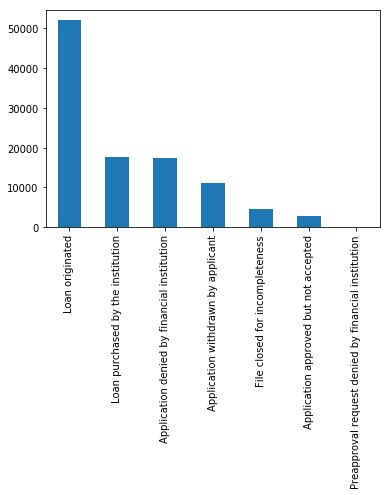

In [15]:
%matplotlib inline
d2.plot.bar()
#plot.show()

In [16]:
#Ethnic groups
data_ethnith=data.groupby(['action_taken_name','applicant_ethnicity_name']).count()
data_ethnith.head(2)


tract_to_msamd_income  \
action_taken_name                     applicant_ethnicity_name                                                    
Application approved but not accepted Hispanic or Latino                                                    111   
                                      Information not provided by applicant in mail, ...                    336   

                                                                                          population  \
action_taken_name                     applicant_ethnicity_name                                         
Application approved but not accepted Hispanic or Latino                                         111   
                                      Information not provided by applicant in mail, ...         336   

                                                                                          minority_population  \
action_taken_name                     applicant_ethnicity_name                                                  
Application approved but not accepted Hispanic or Latino                                                  111   
                                      Information not provided by applicant in mail, ...                  336   

                                                                                          number_of_owner_occupied_units  \
action_taken_name                     applicant_ethnicity_name                                                             
Application approved but not accepted Hispanic or Latino                                                             111   
                                      Information not provided by applicant in mail, ...                             336   

                                                                                          number_of_1_to_4_family_units  \
action_taken_name                     applicant_ethnicity_name                                                            
Application approved but not accepted Hispanic or Latino                                                            111   
                                      Information not provided by applicant in mail, ...                            336   

                                                                                          loan_amount_000s  \
action_taken_name                     applicant_ethnicity_name                                               
Application approved but not accepted Hispanic or Latino                                               111   
                                      Information not provided by applicant in mail, ...               338   

                                                                                          hud_median_family_income  \
action_taken_name                     applicant_ethnicity_name                                                       
Application approved but not accepted Hispanic or Latino                                                       111   
                                      Information not provided by applicant in mail, ...                       336   

                                                                                          state_name  \
action_taken_name                     applicant_ethnicity_name                                         
Application approved but not accepted Hispanic or Latino                                         111   
                                      Information not provided by applicant in mail, ...         338   

                                                                                          state_abbr  \
action_taken_name                     applicant_ethnicity_name                                         
Application approved but not accepted Hispanic or Latino                                         111   
                                      Information not provided by applicant in mail, ...         338   

                     

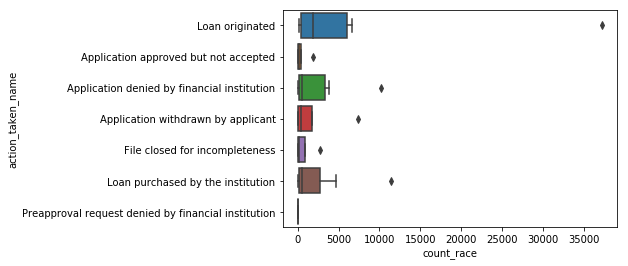

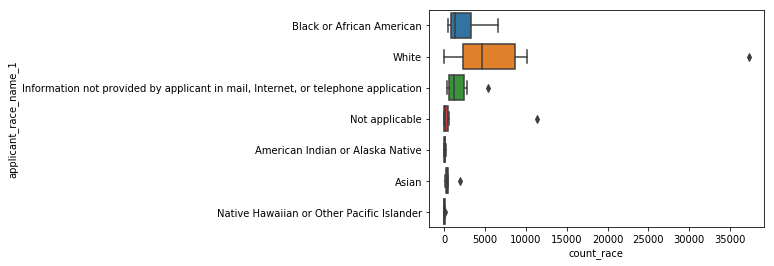

In [17]:
#Loan Status and Ethnicity
#Loan Status and Race
data['count_race']=data.groupby(['action_taken_name','applicant_race_name_1'])['applicant_race_name_1'].transform('count')
data.head(20)
data_sm=data.drop_duplicates(subset=['action_taken_name','applicant_race_name_1'])
data_sm=data_sm[['action_taken_name','applicant_race_name_1','count_race']]
data_sm
ax_sm =sns.boxplot(y='action_taken_name', x='count_race', data=data_sm)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

ax_sm =sns.boxplot(y='applicant_race_name_1', x='count_race', data=data_sm)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()

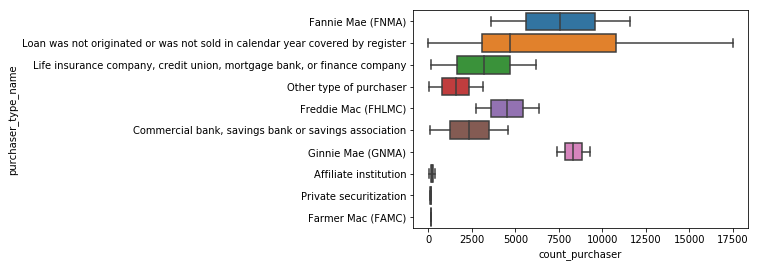

In [18]:
#purchaser
data['count_purchaser']=data.groupby(['action_taken_name','purchaser_type_name'])['purchaser_type_name'].transform('count')
data['purchaser_type_name']
data_purchase=data.drop_duplicates(subset=['action_taken_name','purchaser_type_name'])
data_purchase=data_purchase[['action_taken_name','purchaser_type_name','count_purchaser']]
data_purchase
ax_pur1 =sns.boxplot(y='purchaser_type_name', x='count_purchaser', data=data_purchase)
# #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()


/home/athena/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/athena/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/athena/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


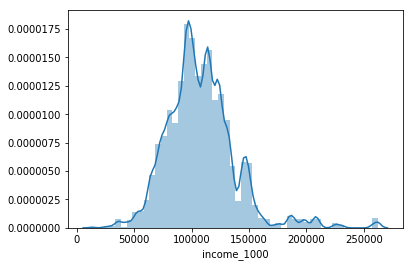

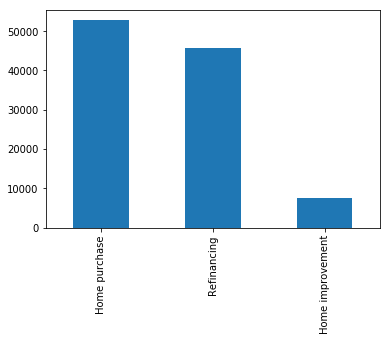

In [19]:
#Applicant Income Distribution
#actionStatus = "Loan originated"
from ggplot import *
data['income_1000']=data['tract_to_msamd_income']*1000
data['loan_amount']=data['loan_amount_000s']*1000
sns.distplot(data.income_1000.dropna(), hist=True)
plt.show()

#loan purpose type   and loan purpose type and their action 
d1=data['loan_purpose_name'].value_counts()

%matplotlib inline
d1.plot.bar(x='count' ,y='loan_purpose_name')
#plot.show()

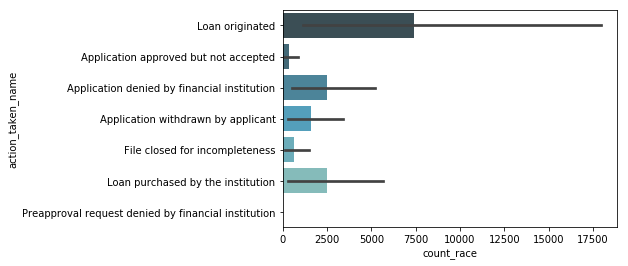

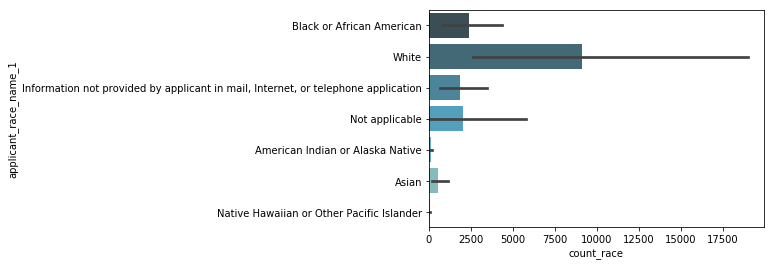

In [20]:
#'action_taken_name','applicant_race_name_1','count_race'
sns.barplot(x="count_race", y='action_taken_name', data=data_sm, palette='GnBu_d')
plt.show()
sns.barplot(x="count_race", y='applicant_race_name_1', data=data_sm, palette='GnBu_d')
plt.show()

In [21]:
data[['applicant_ethnicity_name','population']].groupby(['applicant_ethnicity_name']).count()

,population
applicant_ethnicity_name,
Hispanic or Latino,4122
"Information not provided by applicant in mail, Internet, or telephone application",10834
Not Hispanic or Latino,78315
Not applicable,12074


In [22]:
print(data[data.action_taken_name == 'Loan originated'].population.sum()/data[data.action_taken_name == 'Loan originated'].population.count())


5334.36866102


In [23]:
data['agency_name'].value_counts()

Department of Housing and Urban Development    57761
Consumer Financial Protection Bureau           32813
Federal Deposit Insurance Corporation           5825
Office of the Comptroller of the Currency       4508
National Credit Union Administration            2847
Federal Reserve System                          1943
Name: agency_name, dtype: int64

In [24]:
data['purchaser_type_name'].value_counts()

Loan was not originated or was not sold in calendar year covered by register    49835
Ginnie Mae (GNMA)                                                               16654
Fannie Mae (FNMA)                                                               15172
Freddie Mac (FHLMC)                                                              9059
Life insurance company, credit union, mortgage bank, or finance company          6349
Commercial bank, savings bank or savings association                             4676
Other type of purchaser                                                          3154
Affiliate institution                                                             416
Private securitization                                                            246
Farmer Mac (FAMC)                                                                 136
Name: purchaser_type_name, dtype: int64

In [25]:
got_loan_features=data[['action_taken_name','income_1000','loan_amount','hud_median_family_income',
                            'number_of_1_to_4_family_units','number_of_owner_occupied_units',
                            'applicant_sex_name','co_applicant_sex_name','property_type_name', 'preapproval_name',
    'msamd_name', 'loan_type_name','loan_purpose_name',
    'lien_status_name','hoepa_status_name', 'county_name',
        'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
        'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']]

In [26]:
got_loan_features.head(4)

,action_taken_name,income_1000,loan_amount,hud_median_family_income,number_of_1_to_4_family_units,number_of_owner_occupied_units,applicant_sex_name,co_applicant_sex_name,property_type_name,preapproval_name,...,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_race_name_1,applicant_ethnicity_name,purchaser_type_name
0,Loan originated,130669.998169,166000,80000.0,1370.0,1267.0,Female,No co-applicant,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,New Castle County,No co-applicant,No co-applicant,Black or African American,Not Hispanic or Latino,Fannie Mae (FNMA)
1,Loan originated,92849.998474,210000,80000.0,2133.0,1777.0,Female,Male,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,New Castle County,White,Not Hispanic or Latino,White,Not Hispanic or Latino,Fannie Mae (FNMA)
2,Loan originated,105470.001221,82000,80000.0,567.0,539.0,Female,Male,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,New Castle County,White,Not Hispanic or Latino,White,Not Hispanic or Latino,Fannie Mae (FNMA)
3,Loan originated,91889.999390,100000,62900.0,1662.0,1223.0,Female,No co-applicant,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,Kent County,No co-applicant,No co-applicant,White,Not Hispanic or Latino,Loan was not originated or was not sold in cal...


In [27]:
got_loan_features.isnull().sum()

action_taken_name                   0
income_1000                       352
loan_amount                         0
hud_median_family_income          352
number_of_1_to_4_family_units     352
number_of_owner_occupied_units    352
applicant_sex_name                  0
co_applicant_sex_name               0
property_type_name                  0
preapproval_name                    0
msamd_name                        404
loan_type_name                      0
loan_purpose_name                   0
lien_status_name                    0
hoepa_status_name                   0
county_name                       185
co_applicant_race_name_1            0
co_applicant_ethnicity_name         0
applicant_race_name_1               0
applicant_ethnicity_name            0
purchaser_type_name                 0
dtype: int64

In [28]:
got_loan_features.shape  #(52015, 20)  we had county_name  with 31 , msamd_name with 44, 
                         # number_of_owner_occupied_units  35, number_of_1_to_4_family_units 35, 
                        #hud_median_family_income 35, income_1000 35 records are null, so we can remove them.
        

(105697, 21)

In [29]:

#all records with missing values are dropped
got_loan_features=got_loan_features.dropna()

In [30]:

got_loan_features.head(3)

,action_taken_name,income_1000,loan_amount,hud_median_family_income,number_of_1_to_4_family_units,number_of_owner_occupied_units,applicant_sex_name,co_applicant_sex_name,property_type_name,preapproval_name,...,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_race_name_1,applicant_ethnicity_name,purchaser_type_name
0,Loan originated,130669.998169,166000,80000.0,1370.0,1267.0,Female,No co-applicant,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,New Castle County,No co-applicant,No co-applicant,Black or African American,Not Hispanic or Latino,Fannie Mae (FNMA)
1,Loan originated,92849.998474,210000,80000.0,2133.0,1777.0,Female,Male,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,New Castle County,White,Not Hispanic or Latino,White,Not Hispanic or Latino,Fannie Mae (FNMA)
2,Loan originated,105470.001221,82000,80000.0,567.0,539.0,Female,Male,One-to-four family dwelling (other than manufa...,Not applicable,...,Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,New Castle County,White,Not Hispanic or Latino,White,Not Hispanic or Latino,Fannie Mae (FNMA)


In [31]:
#create target variable Loan Action=1 if loan originated ; Otherwise Loan Action=0(churn)
got_loan_features['Loan Action']= got_loan_features['action_taken_name']== 'Loan originated'


In [32]:
got_loan_features['Loan Action'].value_counts()

False    53322
True     51971
Name: Loan Action, dtype: int64

In [33]:
got_loan_features.columns

Index(['action_taken_name', 'income_1000', 'loan_amount',
       'hud_median_family_income', 'number_of_1_to_4_family_units',
       'number_of_owner_occupied_units', 'applicant_sex_name',
       'co_applicant_sex_name', 'property_type_name', 'preapproval_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'county_name', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'applicant_race_name_1',
       'applicant_ethnicity_name', 'purchaser_type_name', 'Loan Action'],
      dtype='object')

In [34]:
got_loan_features = got_loan_features.drop(['action_taken_name'],axis=1)

In [35]:

Y=pd.get_dummies(got_loan_features['Loan Action'], drop_first=True)


In [36]:
X=pd.get_dummies(got_loan_features[['income_1000', 'loan_amount','hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name', 'co_applicant_sex_name', 'property_type_name',
       'preapproval_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'county_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_ethnicity_name','purchaser_type_name']], drop_first=True)

In [37]:
X.shape

(105293, 58)

In [38]:
Y.shape

(105293, 1)

In [39]:
#X

In [40]:
X.columns

Index(['income_1000', 'loan_amount', 'hud_median_family_income',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_sex_name_Male', 'applicant_sex_name_Not applicable',
       'co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application',
       'co_applicant_sex_name_Male', 'co_applicant_sex_name_No co-applicant',
       'co_applicant_sex_name_Not applicable',
       'property_type_name_Multifamily dwelling',
       'property_type_name_One-to-four family dwelling (other than manufactured housing)',
       'preapproval_name_Preapproval was not requested',
       'preapproval_name_Preapproval was requested',
       'msamd_name_Salisbury - MD, DE', 'msamd_name_Wilmington - DE, MD, NJ',
       'loan_type_name_FHA-insured', 'loan_type_name_FSA/RHS-guaranteed',
       'loan_type_name_VA-guaranteed'

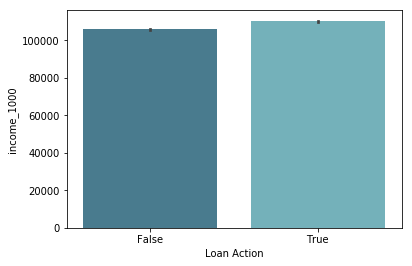

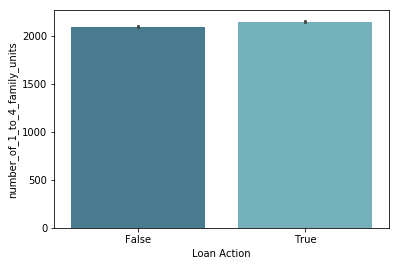

In [41]:
#sns.lmplot(x='income_1000', y='loan_amount', hue='Loan Action', data=got_loan_features, fit_reg=False, scatter_kws={'alpha':0.5})
sns.barplot(y="income_1000", x='Loan Action', data=got_loan_features, palette='GnBu_d')
plt.show()
sns.barplot(y="number_of_1_to_4_family_units", x='Loan Action', data=got_loan_features, palette='GnBu_d')
plt.show()



In [42]:
# from sklearn import preprocessing   Not a big difference in result 
# normalized_X = preprocessing.normalize(X)
#  I will normalize dat afor 5 column to be in range of categorical data 
X['income_1000_1']=abs((X['income_1000'] - X['income_1000'].mean()) / (X['income_1000'].max() - X['income_1000'].min()))

In [43]:
X['loan_amount_1']=abs((X['loan_amount'] - X['loan_amount'].mean()) / (X['loan_amount'].max() - X['loan_amount'].min()))

In [44]:
X['hud_median_family_income_1']=abs((X['hud_median_family_income'] - X['hud_median_family_income'].mean()) / (X['hud_median_family_income'].max() - X['hud_median_family_income'].min()))

In [45]:
X['number_of_owner_occupied_units_1']=abs((X['number_of_owner_occupied_units'] - X['number_of_owner_occupied_units'].mean()) / (X['number_of_owner_occupied_units'].max() - X['number_of_owner_occupied_units'].min()))

In [46]:
X['number_of_1_to_4_family_units_1']=abs((X['number_of_1_to_4_family_units'] - X['number_of_1_to_4_family_units'].mean()) / (X['number_of_1_to_4_family_units'].max() - X['number_of_1_to_4_family_units'].min()))

In [47]:
#after normalizing we drop original non normal columns from X
#.drop([''],axis=1)
X.drop(['income_1000','loan_amount','hud_median_family_income','number_of_1_to_4_family_units','number_of_owner_occupied_units'],axis=1)

,"applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_sex_name_Male,applicant_sex_name_Not applicable,"co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application",co_applicant_sex_name_Male,co_applicant_sex_name_No co-applicant,co_applicant_sex_name_Not applicable,property_type_name_Multifamily dwelling,property_type_name_One-to-four family dwelling (other than manufactured housing),preapproval_name_Preapproval was not requested,...,purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,purchaser_type_name_Private securitization,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_owner_occupied_units_1,number_of_1_to_4_family_units_1
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0.090349,2.092171e-04,0.378113,0.061554,0.149493
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0.061362,6.254995e-05,0.378113,0.059127,0.001926
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0.010738,4.892180e-04,0.378113,0.233821,0.308850
3,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0.065213,4.292178e-04,0.468422,0.071966,0.091545
4,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0.068687,2.507844e-04,0.378113,0.199983,0.207243
5,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0.050892,2.492172e-04,0.552580,0.105804,0.130839
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.084107,2.692173e-04,0.552580,0.004290,0.178151
7,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0.014012,2.107843e-04,0.552580,0.023396,0.399624
8,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.071415,1.474507e-04,0.378113,0.027479,0.125083
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.009519,2.374510e-04,0.468422,0.464712,0.411134


In [48]:
X[['income_1000_1','loan_amount_1','hud_median_family_income_1','number_of_1_to_4_family_units_1','number_of_owner_occupied_units_1']]

,income_1000_1,loan_amount_1,hud_median_family_income_1,number_of_1_to_4_family_units_1,number_of_owner_occupied_units_1
0,0.090349,2.092171e-04,0.378113,0.149493,0.061554
1,0.061362,6.254995e-05,0.378113,0.001926,0.059127
2,0.010738,4.892180e-04,0.378113,0.308850,0.233821
3,0.065213,4.292178e-04,0.468422,0.091545,0.071966
4,0.068687,2.507844e-04,0.378113,0.207243,0.199983
5,0.050892,2.492172e-04,0.552580,0.130839,0.105804
6,0.084107,2.692173e-04,0.552580,0.178151,0.004290
7,0.014012,2.107843e-04,0.552580,0.399624,0.023396
8,0.071415,1.474507e-04,0.378113,0.125083,0.027479
9,0.009519,2.374510e-04,0.468422,0.411134,0.464712


In [49]:
#Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [51]:
#RandomForestClassifier   #test score0.6542991009244017   #train score 0.6591276032833593

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
#print(clf.feature_importances_)
print('test score{}'.format(clf.score(X_test,y_test)))
print('train score {}'.format(clf.score(X_train,y_train)))

 
#test score0.6542991009244017
#train score 0.6591276032833593


/home/athena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


test score0.8566860833227808
train score 0.8543246726816363


In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
stfkfold=StratifiedKFold(n_splits=5 ,random_state=None, shuffle=False)
print('cross validation  stratifiedkfold train score:\n{}'.format(cross_val_score(clf , X_train, y_train,cv=stfkfold)))
print('cross validation  stratifiedkfold test score:\n{}'.format(cross_val_score(clf , X_test, y_test,cv=stfkfold)))


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

cross validation  stratifiedkfold train score:
[ 0.86277303  0.85455532  0.8532664   0.8527237   0.84531886]


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


cross validation  stratifiedkfold test score:
[ 0.85881608  0.84868629  0.85960747  0.85673579  0.85926864]


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [53]:
# #logistic regression Not A Good Choice
# # #Fitting Logistic Regression to the Training set
# from sklearn.linear_model import LogisticRegression
# classifierlog = LogisticRegression(random_state = 42)
# classifierlog.fit(X_train, y_train)

# logistictrainscore=classifierlog.score(X_train,y_train)
# logistictestscore=classifierlog.score(X_test,y_test)
# print('logistic train score {}'.format(logistictrainscore))
# print('logistic test score {}'.format(logistictestscore))


# # logistic train score 0.5714130655993488
# # logistic test score 0.5719260478662783

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=1500, max_samples=33,
                        random_state=1)

bag.fit(X_train, y_train)


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=33, n_estimators=1500, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [55]:
print('test score{}'.format(bag.score(X_test,y_test)))
print('train score {}'.format(bag.score(X_train,y_train)))


test score0.9028745093073319
train score 0.9007665694321959


In [56]:
#gradiantboost
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier(random_state=42, learning_rate=.01 , max_depth=3)
gradboost.fit(X_train,y_train)
print("gradiant boosting train set score {}".format(gradboost.score(X_train,y_train)))
print("gradiant boosting test set score {}".format(gradboost.score(X_test,y_test)))


# #pre-prunning to reduce overfitting by max_depth
# gradboost_pre_prun1=GradientBoostingClassifier(random_state=42 , max_depth=3)
# gradboost_pre_prun1.fit(X_train,y_train)
# print(gradboost_pre_prun1.score(X_train,y_train))
# print(gradboost_pre_prun1.score(X_test,y_test))



/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradiant boosting train set score 0.9016620310698054
gradiant boosting test set score 0.9038558946435356


In [57]:
# test a random sample 

ypred = gradboost.predict(X_test)

# We can take a look at the classification report for this classifier:

from sklearn import metrics
print(metrics.classification_report(ypred, y_test))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label');


             precision    recall  f1-score   support

          0       1.00      0.84      0.91     19091
          1       0.80      1.00      0.89     12497

avg / total       0.92      0.90      0.90     31588



In [58]:
mat

array([[16061,     7],
       [ 3030, 12490]])

In [59]:
ypred_forest =clf.predict(X_test)
mat_forest = confusion_matrix(y_test, ypred_forest)


In [60]:
mat_forest

array([[14459,  1609],
       [ 2918, 12602]])

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
print("Xgboosting train set score {}".format(model.score(X_train,y_train)))
print("Xgboosting test set score {}".format(model.score(X_test,y_test)))


/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/athena/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Xgboosting train set score 0.9126246523302354
Xgboosting test set score 0.9131632265417247


In [66]:
ypred_xg =model.predict(X_test)
mat_xg = confusion_matrix(y_test, ypred_xg)



In [63]:
mat_xg

array([[15711,   357],
       [ 2386, 13134]])

In [64]:
predictions = [round(value) for value in ypred_xg]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.32%


(63,)
(63,)


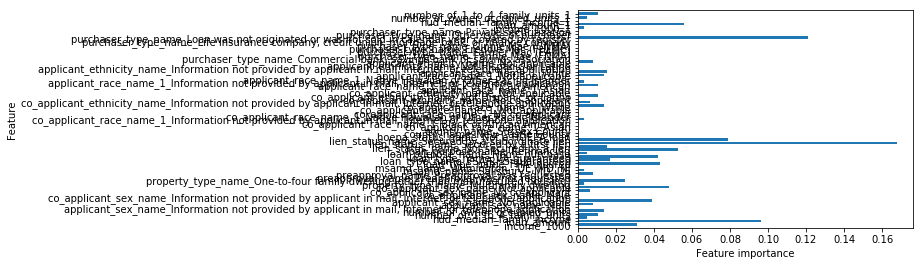

In [65]:
import numpy as np
def plot_feature_importances_churn(anymodel):
    print(anymodel.feature_importances_.shape)
    print(X.columns.shape)
    n_features = X.shape[1]
    plt.barh(range(n_features), anymodel.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
#dataset_train.shape
plot_feature_importances_churn(model)
